<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN Classification*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

%matplotlib inline

In [132]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

In [133]:
data = pd.read_csv(breast_cancer_csv)

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [134]:
data = data.drop(['Unnamed: 32'], axis = 1)
data.drop(['id'], axis=1, inplace=True)

In [135]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [136]:
data["diagnosis"].replace({"M": 1, "B": 0}, inplace=True)
print(data)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010  

In [137]:
data.groupby('diagnosis').size()

diagnosis
0    357
1    212
dtype: int64

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [138]:
# ANSWER
# Target Variable
y = data['diagnosis']
#Select all predictors except target variable
X = data.drop('diagnosis', axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

### 4. What is the baseline accuracy?

In [139]:
# ANSWER
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
models_list = []
models_list.append(('SVM', SVC())) 
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds)
    start = time.time()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

SVM: 0.910729 (0.050253) (run time: 0.052356)
NB: 0.931781 (0.033643) (run time: 0.029900)
KNN: 0.915992 (0.051053) (run time: 0.040449)


### 5. Choose features to be your predictor variables and set up your X.

In [140]:
# ANSWER
data.corr()['diagnosis'].sort_values(ascending = False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [163]:
# I chose the feature which are strongly correlated with quality
predictor_columns = ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst','perimeter_mean','area_worst']

In [142]:
X = data[predictor_columns]
X.head()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst
0,0.2654,184.60,0.14710,25.38,122.80,2019.0
1,0.1860,158.80,0.07017,24.99,132.90,1956.0
2,0.2430,152.50,0.12790,23.57,130.00,1709.0
3,0.2575,98.87,0.10520,14.91,77.58,567.7
4,0.1625,152.20,0.10430,22.54,135.10,1575.0


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [144]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
# fit on the unstandardized data:

KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [145]:
# ANSWER
# predict the response values for the observations in X ("test the model")
# store the predicted response values
from sklearn import metrics
y_pred = neigh.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  1.0
Test set Accuracy:  0.851063829787234


### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [146]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state=42 for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 80% test
# STEP 2: train the model on the training set (using K=1)
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
# STEP 3: test the model on the testing set, and check the accuracy
y_pred = neigh.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  1.0
Test set Accuracy:  0.9210526315789473


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [147]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data

# Fit Train Data

# Print accuracy_score

# STEP 1: split X and y into training and testing sets (using random_state=42 for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 80% test
# STEP 2: train the model on the training set (using K=1)
k = 100
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
# STEP 3: test the model on the testing set, and check the accuracy
y_pred = neigh.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.9252747252747253
Test set Accuracy:  0.9035087719298246


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [148]:
# fit the KNN from 1 to no. of rows
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.868421052631579, 0.8771929824561403, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.8771929824561403, 0.8947368421052632, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.8947368421052632, 0.8771929824561403, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.8947368421052632]


Text(0, 0.5, 'Testing Accuracy')

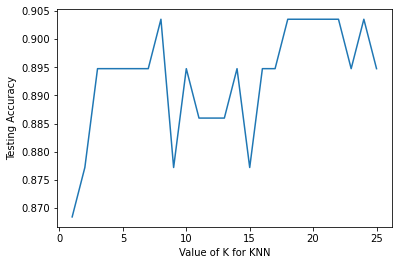

In [149]:
# plot test accuracy by number of neighbors:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [150]:
# ANSWER
# use the same model as before
knn = KNeighborsClassifier(n_neighbors = 5)

# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

# print all 5 times scores 
print(scores)

# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())

[0.877 0.904 0.912 0.912 0.912]
0.9033535165346998


In [151]:
# use the same model as before
knn = KNeighborsClassifier(n_neighbors = 13)

# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

# print all 5 times scores 
print(scores)

# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())

[0.868 0.912 0.921 0.912 0.938]
0.9104176370128861


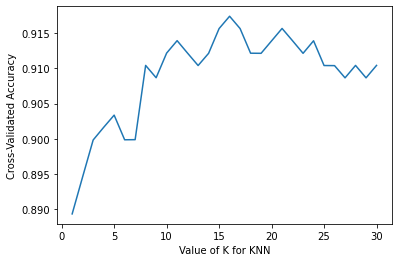

In [152]:
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

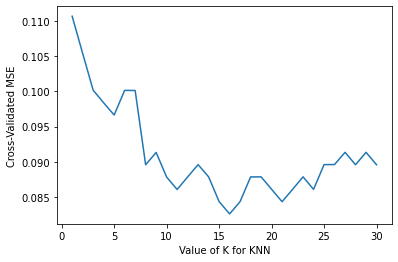

In [153]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    loss = abs(cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error'))
    k_scores.append(loss.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

{'knn__n_neighbors': 10}

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        73
           1       0.97      0.95      0.96        41

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Best score is: 0.9516483516483516


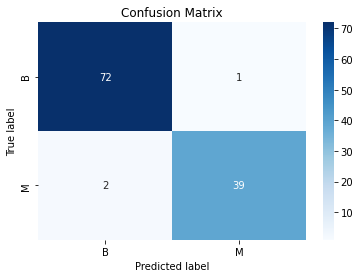

In [154]:
# ANSWER
# Standarize X
from sklearn.preprocessing import StandardScaler

steps = [('scaler', StandardScaler()), 
         ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)
parameters = {'knn__n_neighbors' : np.arange(1, 50)}


k_nn = GridSearchCV(pipeline, param_grid=parameters)
k_nn.fit(X_train, y_train)
y_pred = k_nn.predict(X_test)

print(k_nn.best_params_)
print()
print(classification_report(y_test, y_pred))
print("Best score is: {}".format(k_nn.best_score_))

ConfMatrix = confusion_matrix(y_test,k_nn.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

In [155]:
cv_knn = cross_val_score(k_nn, X, y, cv=5, scoring='accuracy')
print('Average 5-Fold CV Score: ', cv_knn.mean(), ', Standard deviation: ', cv_knn.std())

Average 5-Fold CV Score:  0.9508150908244062 , Standard deviation:  0.021157533997779945


In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [158]:
y_pred = classifier.predict(X_test)


In [159]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[71  2]
 [ 2 39]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        73
           1       0.95      0.95      0.95        41

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



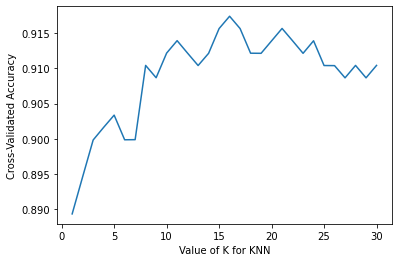

In [162]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X,y)

# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



